In [359]:
import sys
!{sys.executable} -m pip install --quiet opencv-python azure-cognitiveservices-vision-face

import os, requests, glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

import asyncio
import io
import time
import uuid
from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face.models import TrainingStatusType, Person

In [360]:
key = '6bc7f05e83d542e89310f3e35c30c872'
endpoint = 'https://itfest-task3.cognitiveservices.azure.com/'
key2 = 'ab844d8e667742d3b92d8f15d70d60ce'
endpoint2 = 'https://bomba.cognitiveservices.azure.com/'

In [361]:
import azure.cognitiveservices.vision.face as cf
from msrest.authentication import CognitiveServicesCredentials
cli = cf.FaceClient(endpoint,CognitiveServicesCredentials(key))
cli2 = cf.FaceClient(endpoint2,CognitiveServicesCredentials(key2))
print(cli2)
face_url = 'https://sun9-16.userapi.com/Ubtc1qJ0otxxtsMncFg2wgFT5jiSk2JHUSsB0A/4mU69BYnWVg.jpg'
res = cli.face.detect_with_url(face_url,return_face_landmarks=True)
print(res[0].face_landmarks.as_dict())
face_client = FaceClient(endpoint, CognitiveServicesCredentials(key))

{'pupil_left': {'x': 197.1, 'y': 264.5}, 'pupil_right': {'x': 232.5, 'y': 258.8}, 'nose_tip': {'x': 211.4, 'y': 286.3}, 'mouth_left': {'x': 203.5, 'y': 308.9}, 'mouth_right': {'x': 235.4, 'y': 304.1}, 'eyebrow_left_outer': {'x': 180.0, 'y': 258.4}, 'eyebrow_left_inner': {'x': 204.8, 'y': 252.7}, 'eye_left_outer': {'x': 191.3, 'y': 266.3}, 'eye_left_top': {'x': 195.6, 'y': 262.2}, 'eye_left_bottom': {'x': 196.7, 'y': 267.3}, 'eye_left_inner': {'x': 202.2, 'y': 264.1}, 'eyebrow_right_inner': {'x': 217.6, 'y': 250.6}, 'eyebrow_right_outer': {'x': 246.8, 'y': 246.1}, 'eye_right_inner': {'x': 226.0, 'y': 260.7}, 'eye_right_top': {'x': 231.6, 'y': 256.8}, 'eye_right_bottom': {'x': 232.5, 'y': 262.7}, 'eye_right_outer': {'x': 238.5, 'y': 258.4}, 'nose_root_left': {'x': 206.5, 'y': 264.6}, 'nose_root_right': {'x': 219.1, 'y': 263.3}, 'nose_left_alar_top': {'x': 205.3, 'y': 279.6}, 'nose_right_alar_top': {'x': 220.7, 'y': 279.6}, 'nose_left_alar_out_tip': {'x': 202.0, 'y': 289.0}, 'nose_right_a

Анализируем изображение:  images\1-1.jpg


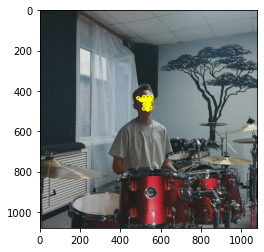

In [362]:
def imread(fn):
    im = cv2.imread(fn)
    return cv2.cvtColor(im,cv2.COLOR_BGR2RGB) if im is not None else None

fn = glob.glob('images/*')[0]
print('Анализируем изображение: ',fn)

img = imread(fn)
cli.face.detect_with_url(face_url)
with open(fn,'rb') as f:
    res = cli.face.detect_with_stream(f,return_face_landmarks=True)
for k,v in res[0].face_landmarks.as_dict().items():
    cv2.circle(img,(int(v['x']),int(v['y'])),7,(255,255,0),5)
plt.imshow(img)

In [363]:
single_face_image_url = 'https://sun9-16.userapi.com/Ubtc1qJ0otxxtsMncFg2wgFT5jiSk2JHUSsB0A/4mU69BYnWVg.jpg'
single_image_name = os.path.basename(single_face_image_url)
detected_faces = face_client.face.detect_with_url(url=single_face_image_url, detection_model='detection_03')
if not detected_faces:
    raise Exception('No face detected from image {}'.format(single_image_name))

print('Detected face ID from', single_image_name, ':')
for face in detected_faces: print (face.face_id)
print()

first_image_face_ID = detected_faces[0].face_id


Detected face ID from 4mU69BYnWVg.jpg :
f8495980-43be-4110-9611-1fb435c71c14



In [364]:
filenames = []
images = []
imagepoints = []
cli.face.detect_with_url(face_url)
for fn in glob.glob("images/*")[0:10]:
    print("Идёт обработка {} ".format(fn),end='')
    try:
        with open(fn,'rb') as f:
            res = cli.face.detect_with_stream(f,return_face_landmarks=True)
    except:
        print(' - ОШИБКА - ',end='')
        res = []
    print(' найдено {} лиц'.format(len(res)))
    if len(res)>0:
        filenames.append(fn)
        images.append(imread(fn))
        imagepoints.append(res[0].face_landmarks.as_dict())

Идёт обработка images\1-1.jpg  найдено 1 лиц
Идёт обработка images\1-10.jpg  найдено 1 лиц
Идёт обработка images\1-2.jpg  найдено 1 лиц
Идёт обработка images\1-3.jpg  найдено 1 лиц
Идёт обработка images\1-4.jpg  найдено 1 лиц
Идёт обработка images\1-5.jpg  найдено 1 лиц
Идёт обработка images\1-6.jpg  найдено 1 лиц
Идёт обработка images\1-7.jpg  найдено 1 лиц
Идёт обработка images\1-8.jpg  найдено 1 лиц
Идёт обработка images\1-9.jpg  найдено 1 лиц


In [365]:
single_face_image_url = 'https://sun9-16.userapi.com/Ubtc1qJ0otxxtsMncFg2wgFT5jiSk2JHUSsB0A/4mU69BYnWVg.jpg'
single_image_name = os.path.basename(single_face_image_url)
detected_faces = face_client.face.detect_with_url(url=single_face_image_url, detection_model='detection_03')
if not detected_faces:
    raise Exception('No face detected from image {}'.format(single_image_name))

def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))


response = requests.get(single_face_image_url)
img = Image.open(BytesIO(response.content))

print('Drawing rectangle around face... see popup for results.')
draw = ImageDraw.Draw(img)
for face in detected_faces:
    draw.rectangle(getRectangle(face), outline='red')

img.show()

Drawing rectangle around face... see popup for results.


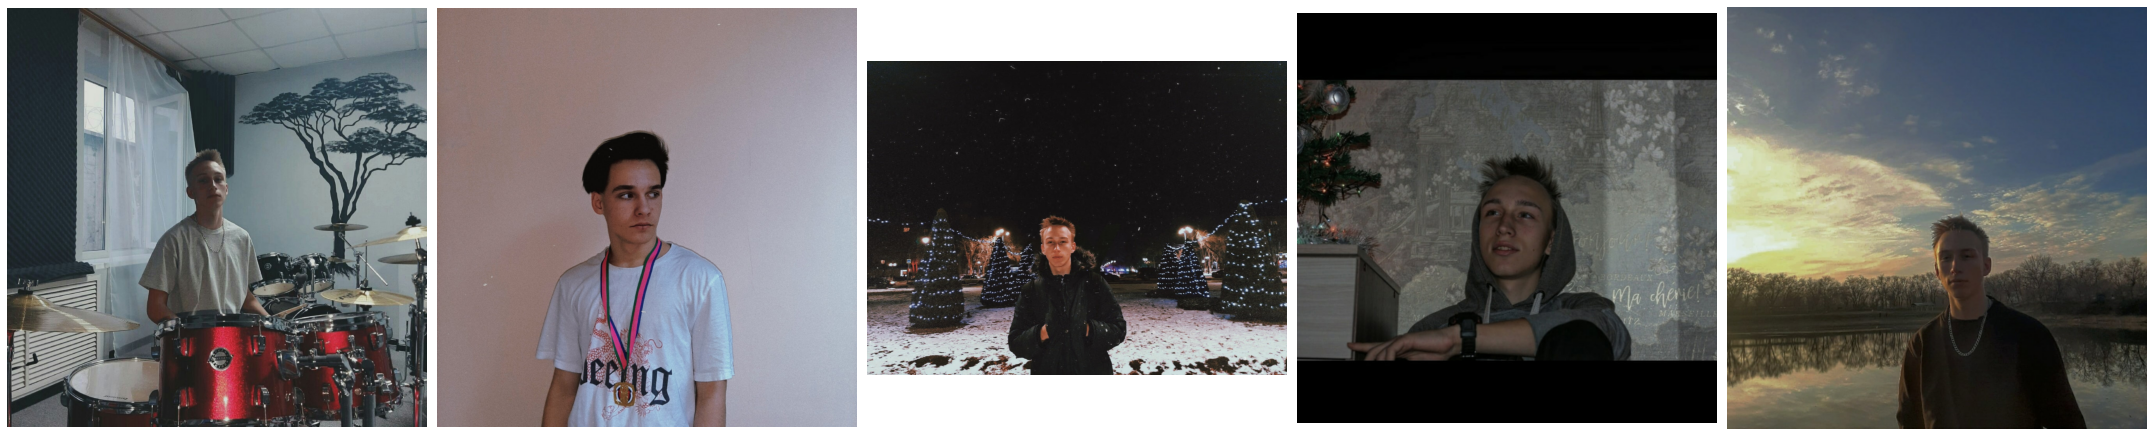

In [366]:
def display_images(l):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

display_images(images[:5])

In [367]:
target_triangle = np.float32([[130.0,120.0],[170.0,120.0],[150.0,160.0]])
size = 300

def affine_transform(img,attrs):
    mc_x = (attrs['mouth_left']['x']+attrs['mouth_right']['x'])/2.0
    mc_y = (attrs['mouth_left']['y'] + attrs['mouth_right']['y']) / 2.0
    tr = cv2.getAffineTransform(np.float32([(attrs['pupil_left']['x'],attrs['pupil_left']['y']),
                                            (attrs['pupil_right']['x'],attrs['pupil_right']['y']),
                                            (mc_x,mc_y)]), target_triangle)                                
    return cv2.warpAffine(img,tr,(size,size))

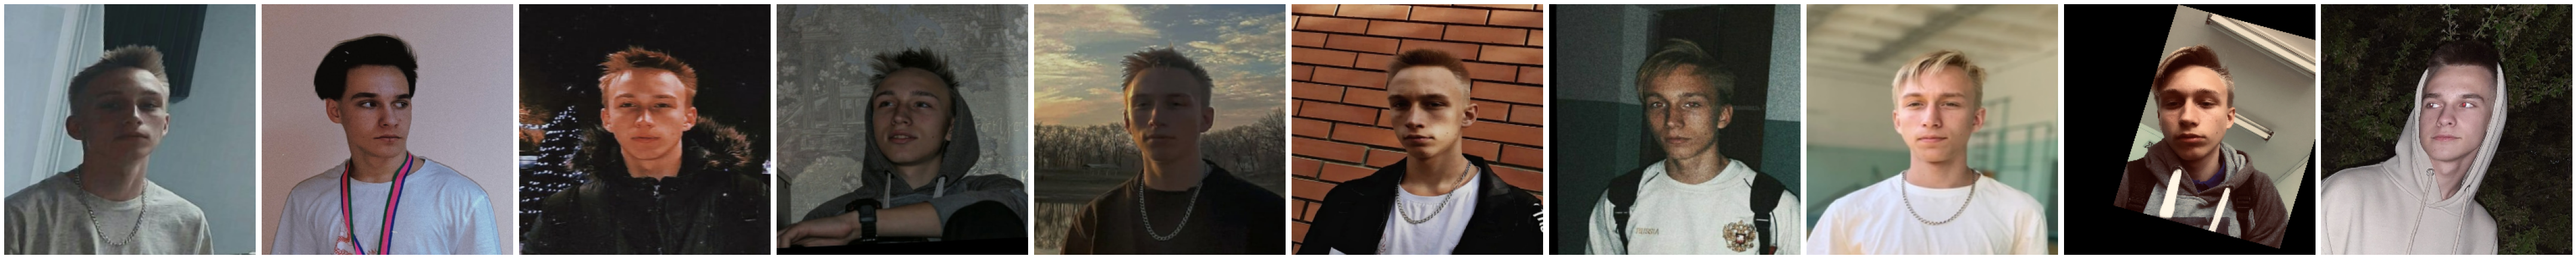

In [368]:
img_aligned = [affine_transform(i,a) for i,a in zip(images,imagepoints)]
display_images(img_aligned[:13])

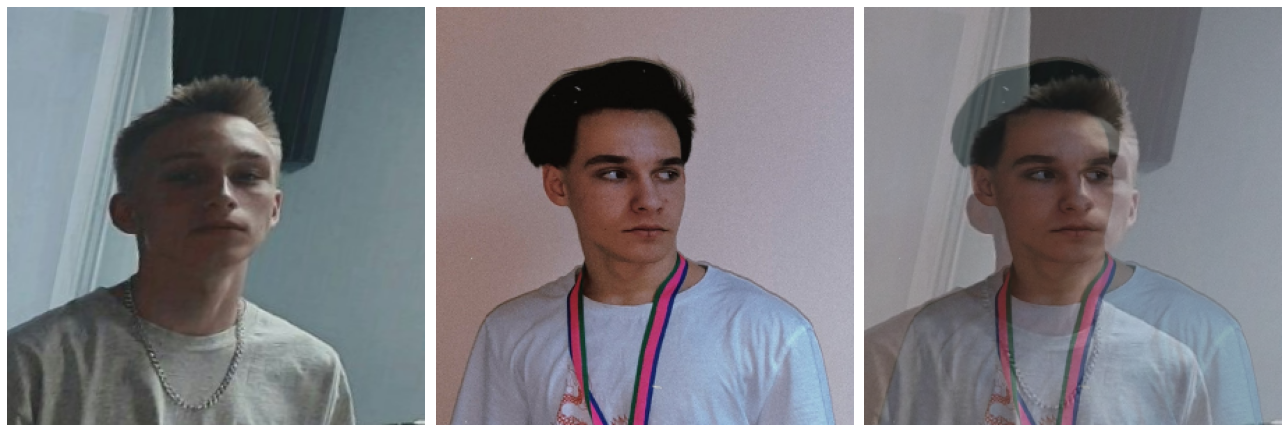

In [369]:
def merge(images,wts=None):
    res = np.zeros_like(images[0],dtype=np.float32)
    if wts is None:
        wts = np.ones(len(images))
    wts /= np.sum(wts)
    for n,i in enumerate(images):
        res += wts[n]*i.astype(np.float32)/255.0
    return res

display_images([img_aligned[0],img_aligned[1],merge(img_aligned[0:2])])


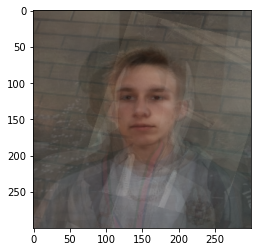

In [370]:
res = merge(img_aligned)
plt.imshow(res)


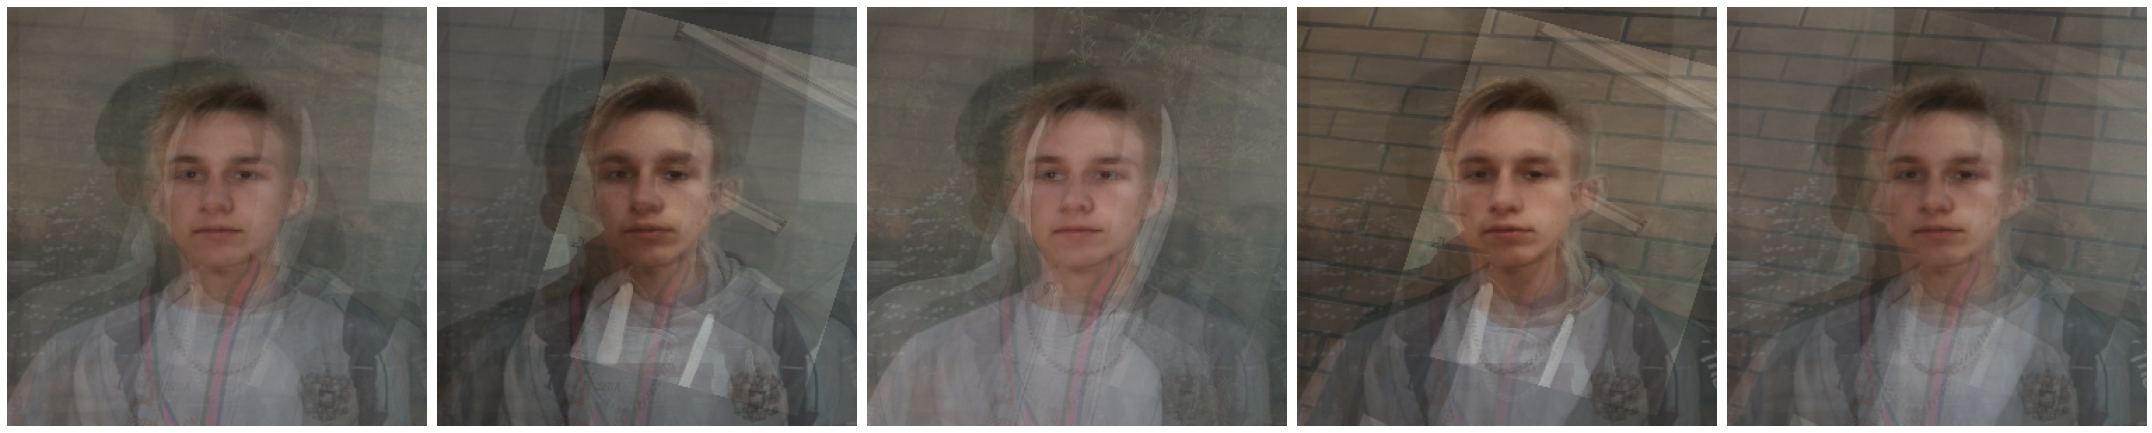

In [371]:
imgs = [merge(img_aligned,np.random.random(len(img_aligned))) for _ in range(5)]
display_images(imgs)

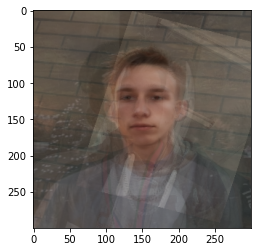

In [372]:
res = merge(img_aligned,np.random.random(len(img_aligned)))
plt.imshow(res)

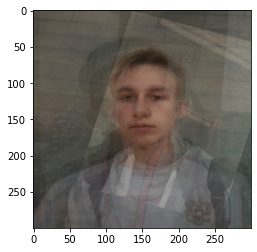

In [373]:
res = merge(img_aligned,np.random.random(len(img_aligned)))
plt.imshow(res)

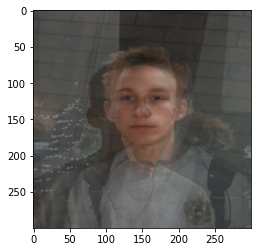

In [374]:
res = merge(img_aligned,np.random.random(len(img_aligned)))
plt.imshow(res)

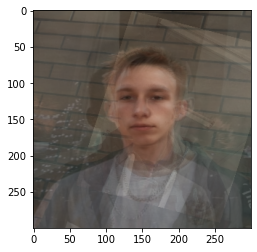

In [375]:
res = merge(img_aligned,np.random.random(len(img_aligned)))
plt.imshow(res)

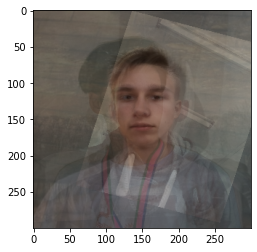

In [376]:
res = merge(img_aligned,np.random.random(len(img_aligned)))
plt.imshow(res)

In [377]:
target_triangle = np.float32([[130.0,120.0],[150.0,120.0],[140.0,160.0]])
size = 300

def affine_transform(img,attrs):
    mc_x = (attrs['mouth_left']['x'] + attrs['mouth_right']['x'])/2.0
    mc_y = (attrs['mouth_left']['y'] + attrs['mouth_right']['y']) / 2.0
    tr = cv2.getAffineTransform(np.float32([(attrs['nose_root_left']['x'],attrs['nose_root_left']['y']),
                                            (attrs['nose_root_right']['x'],attrs['nose_root_right']['y']),
                                            (mc_x,mc_y)]), target_triangle)                                
    return cv2.warpAffine(img,tr,(size,size))

img_aligned = [affine_transform(i,a) for i,a in zip(images,imagepoints)]

In [378]:
def merge(images,wts=None):
    res = np.zeros_like(images[0],dtype=np.float32)
    if wts is None:
        wts = np.ones(len(images))
    wts /= np.sum(wts)
    for n,i in enumerate(images):
        res += wts[n]*i.astype(np.float32)
    return res.astype(np.ubyte)

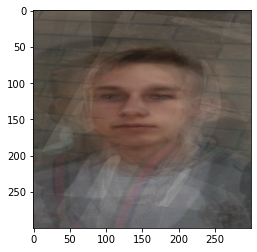

In [379]:
res = merge(img_aligned)
plt.imshow(res)

In [380]:
from math import sqrt

In [381]:
from math import sin,cos,pi
import numpy as np

width = 2000
height = 2000
radius = 988
n_ppl = 77
da = pi/42

def get_tri(i):
    centr = [width/2, height*0.5]# if i%3 == 0 else [width*0.15, height*0.15] if i%3 == 1 else [width*0.85, height*0.15]
    a = i*2*pi/100
    x1 = centr[0]
    y1 = centr[1]
    x3 = x1 + radius*cos(a)
    y3 = y1 + radius*sin(a+da)#rast_pup[i][0]*sin(a)
    x2 = x1 + radius*cos(a-da)#rast_pup[i][0]*sin(a-da)#(sqrt(rast[i][0]**2 + rast[i][1]**2))*cos(a - alfa[i])
    y2 = y1 + radius*sin(a-da)#rast_pup[i][0]*sin(a-da)#(sqrt(rast[i][0]**2 + rast[i][1]**2))*sin(a - alfa[i])
    return [(x1,y1),(x2,y2),(x3,y3)]

triangles = [ get_tri(i) for i in range(n_ppl)]

def get_transform(f,flag):
    flag = min(flag,len(triangles)-1)
    mc_x = (f['mouth_left']['x'] + f['mouth_right']['x']) / 2.0
    mc_y = (f['mouth_left']['y'] + f['mouth_right']['y']) / 2.0
    return cv2.getAffineTransform(np.float32([(f['pupil_left']['x'],f['pupil_left']['y']),(f['pupil_right']['x'],f['pupil_right']['y']),(mc_x,mc_y)]),
                                np.float32(triangles[flag]))

def transform(img,pts,flag):
    tr = get_transform(pts,flag)
    return cv2.warpAffine(img,tr,(width,height))


In [382]:
img_aligned = [transform(i,a,n%n_ppl) for i,a,n in zip(images,imagepoints,range(len(images)))]

In [383]:
def merge(images,wts=None,normalize=True):
    images = list(images)
    res = np.zeros_like(images[0],dtype=np.float32)
    if wts is None:
        wts = np.ones(len(images))
    wts /= np.sum(wts)
    for n,i in enumerate(images):
        res += wts[n]*i.astype(np.float32)
    if normalize:
        mi = res.min()
        ma = res.max()
        res = 255.0*(res-mi)/(ma-mi)
    return res.astype(np.ubyte)

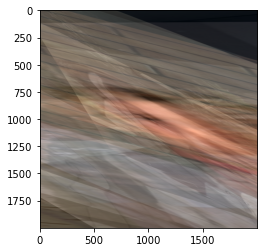

In [384]:
res = merge(img_aligned)
plt.imshow(res)

In [385]:
def get_tri(i):
    a = i*2*pi/n_ppl
    x1 = width/2+radius*cos(a-da)
    y1 = height/2+radius*sin(a-da)
    x2 = width/2+radius*cos(a+da)
    y2 = height/2+radius*sin(a+da)
    x3 = width/2+(radius-150)*cos(a)
    y3 = height/2+(radius-150)*sin(a)
    return [(x1,y1),(x2,y2),(x3,y3)]

triangles = [ get_tri(i) for i in range(n_ppl)]

In [386]:

n_ppl = 28

def get_transform(f,flag):
    flag = min(flag,len(triangles)-1)
    mc_x = (f['mouth_left']['x']+f['mouth_right']['x'])/2.0
    mc_y = (f['mouth_left']['y'] + f['mouth_right']['y']) / 2.0
    return cv2.getAffineTransform(np.float32([(f['nose_root_left']['x'],f['nose_root_left']['y']),(f['nose_root_right']['x'],f['nose_root_right']['y']),(mc_x,mc_y)]),
                                np.float32(triangles[flag]))

def transform(img,pts,flag):
    tr = get_transform(pts,flag)
    return cv2.warpAffine(img,tr,(width,height))

img_aligned = [transform(i,a,n%n_ppl) for i,a,n in zip(images,imagepoints,range(len(images)))]

Полученный когнитивный портрет


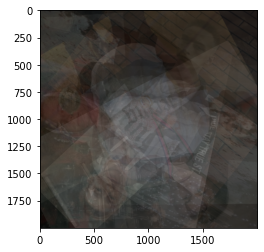

In [399]:
res = merge(img_aligned)
plt.imshow(res)
print("Полученный когнитивный портрет")

In [400]:
img = (cv2.cvtColor(res,cv2.COLOR_BGR2RGB)*255.0).astype(np.int)
cv2.imwrite('result.jpg',res)

True

In [389]:
from math import sin,cos,pi
import numpy as np

width = 2000
height = 2000
radius = 800
n_ppl = 6
da = 2*pi/360*5

def get_tri(i):
    a = i*2*pi/n_ppl
    x1 = width/2+radius*cos(a-da)
    y1 = height/2+radius*sin(a-da)
    x2 = width/2+radius*cos(a+da)
    y2 = height/2+radius*sin(a+da)
    x3 = width/2+(radius-150)*cos(a)
    y3 = height/2+(radius-150)*sin(a)
    return [(x1,y1),(x2,y2),(x3,y3)]

triangles = [ get_tri(i) for i in range(n_ppl)]

def get_transform(f,flag):
    flag = min(flag,len(triangles)-1)
    mc_x = (f['mouth_left']['x']+f['mouth_right']['x'])/2.0
    mc_y = (f['mouth_left']['y'] + f['mouth_right']['y']) / 2.0
    return cv2.getAffineTransform(np.float32([(f['pupil_left']['x'],f['pupil_left']['y']),(f['pupil_right']['x'],f['pupil_right']['y']),(mc_x,mc_y)]),
                                np.float32(triangles[flag]))

def transform(img,pts,flag):
    tr = get_transform(pts,flag)
    return cv2.warpAffine(img,tr,(width,height))

In [390]:
img_aligned = [transform(i,a,n%n_ppl) for i,a,n in zip(images,imagepoints,range(len(images)))]

In [391]:
def merge(images,wts=None,normalize=True):
    images = list(images)
    res = np.zeros_like(images[0],dtype=np.float32)
    if wts is None:
        wts = np.ones(len(images))
    wts /= np.sum(wts)
    for n,i in enumerate(images):
        res += wts[n]*i.astype(np.float32)
    if normalize:
        mi = res.min()
        ma = res.max()
        res = 255.0*(res-mi)/(ma-mi)
    return res.astype(np.ubyte)

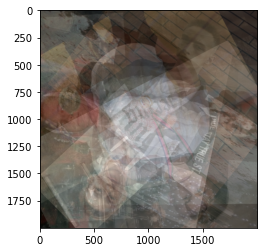

In [392]:
res = merge(img_aligned)
plt.imshow(res)

In [393]:
def merge(imgs):
    return (np.average(np.array(imgs)/255.,axis=0)*255).astype(np.ubyte)

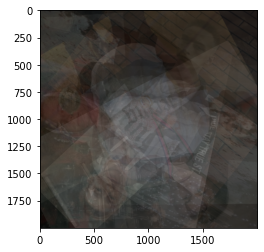

In [394]:
res = merge(img_aligned)
plt.imshow(res)